# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [ ]:
### Your code here . . .
import pandas as pd
blast_result = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

#create header for dataframe
header_columns = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches",
                  "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score",
                  "% positives", "bonds", "publications"]

blast_result_df = pd.read_csv(blast_result,
                              na_values=['-'],
                              skiprows=7, # skip the first 7 rows (the comment lines)
                              names=header_columns, #sets the header
                              usecols=header_columns
                              #comment="#" #tells pandas that the lines starting with # are comments
                              )

#drop the query acc.ver column
blast_result_df = blast_result_df.drop("query acc.ver", axis=1)

#set subject acc.ver as the index
blast_result_df = blast_result_df.set_index('subject acc.ver')

#show first 5 rows of resulting dataframe (5 is default val for head)
blast_result_df.head()


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3.0


### Question 2
What is the average number of publications?

In [ ]:
### Your code here . . .

#calculates the mean of the publications column
blast_result_df["publications"].mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [ ]:
### Your code here . . .

#create method to remove the commas and whitespace from each row's "bonds" number value
#returns the cleaned value
def remove_commas_whitespace(row):
  remove_comma = row["bonds"].replace(",","")
  remove_whitespace = remove_comma.strip()
  return remove_whitespace

#apply the method to each entry in the df
blast_result_df["bonds"] = blast_result_df.apply(remove_commas_whitespace, axis="columns")

#convert values in "bonds" column to a number
blast_result_df["bonds"] = pd.to_numeric(blast_result_df["bonds"], errors="coerce")

#filter for values above 15000
blast_result_df[blast_result_df["bonds"] > 15000]

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0
6G2J_H,100.000,317,0,0,2,318,2,318,0,626,100.00,15663,29.0
YP_002791042.1,99.057,318,3,0,1,318,1,318,0,625,99.69,15830,37.0
AGK29634.1,99.057,318,3,0,1,318,1,318,0,623,99.69,17381,14.0
0806162F,100.000,315,0,0,4,318,1,315,0,622,100.00,17499,43.0
YP_009112408.1,97.170,318,9,0,1,318,1,318,0,615,99.37,16861,46.0
YP_001876469.1,96.855,318,10,0,1,318,1,318,0,613,99.06,16274,22.0
YP_009092269.1,96.226,318,12,0,1,318,1,318,0,610,98.11,16170,47.0


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

Text(0.5, 1.0, "Correlation between '% identity' and '% positives'")

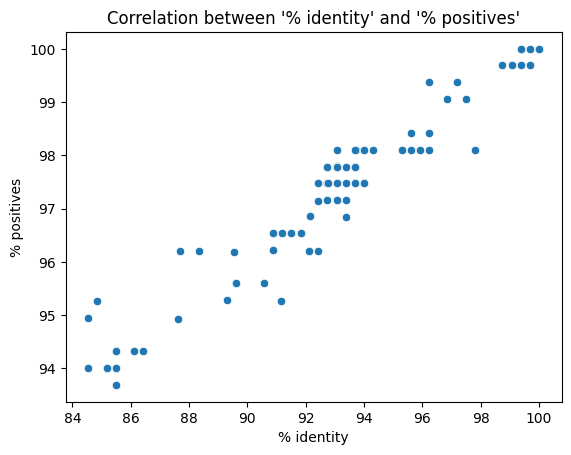

In [ ]:
### Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt

#scatterplot with '% identity' as x axis and '% positives' as y axis
sns.scatterplot(data=blast_result_df,
                x="% identity",
                y="% positives")

#plot title
plt.title("Correlation between '% identity' and '% positives'")

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [ ]:
### Your code here . . .
protein = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"

#read in the csv, removing the extra unnamed column
protein_df = pd.read_csv(protein,
                         usecols=["Protein", "Source"])

#set index as Protein so it has same index as main dataframe
protein_df = protein_df.set_index("Protein")

#set the protein_df as a new column in blast_result_df
blast_result_df["Protein Source"] = protein_df
blast_result_df

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein Source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NaN
ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NaN
YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,GenPept
